In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df = pd.get_dummies(data=df,columns=['STATE'])

In [5]:
df.head()

,RND,ADMIN,MKT,PROFIT,STATE_California,STATE_Florida,STATE_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df.iloc[:,0:4] = ss.fit_transform(df.iloc[:,0:4])

In [8]:
df.head()

,RND,ADMIN,MKT,PROFIT,STATE_California,STATE_Florida,STATE_New York
0,2.016411,0.560753,2.153943,2.011203,0,0,1
1,1.955860,1.082807,1.923600,1.999430,1,0,0
2,1.754364,-0.728257,1.626528,1.980842,0,1,0
3,1.554784,-0.096365,1.422210,1.776627,0,0,1
4,1.504937,-1.079919,1.281528,1.357740,0,1,0


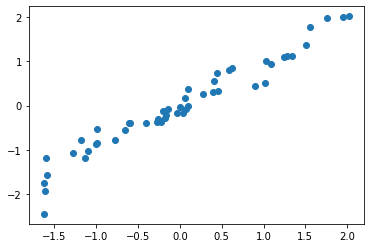

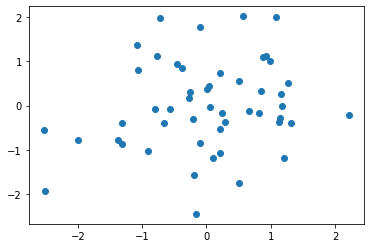

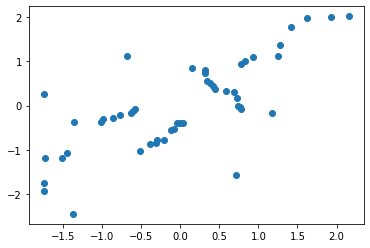

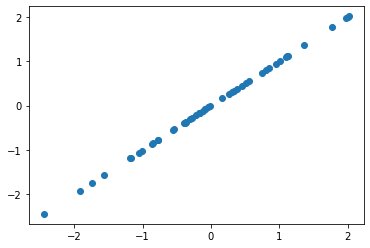

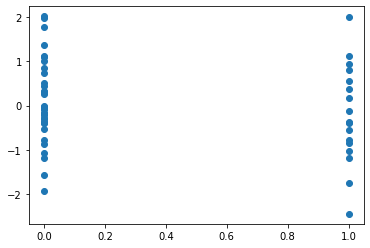

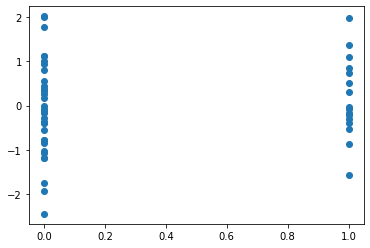

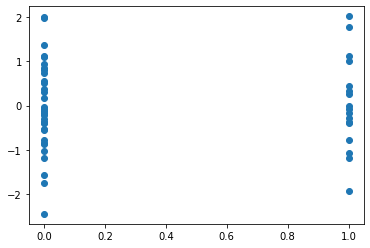

In [10]:
for i in df.columns:
  plt.scatter(df[i],df["PROFIT"])
  plt.show()

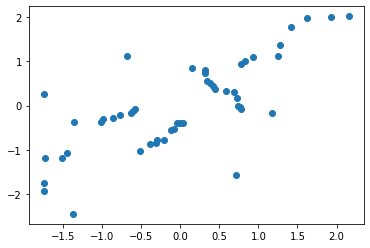

In [11]:
plt.scatter(df.iloc[:,2],df["PROFIT"])

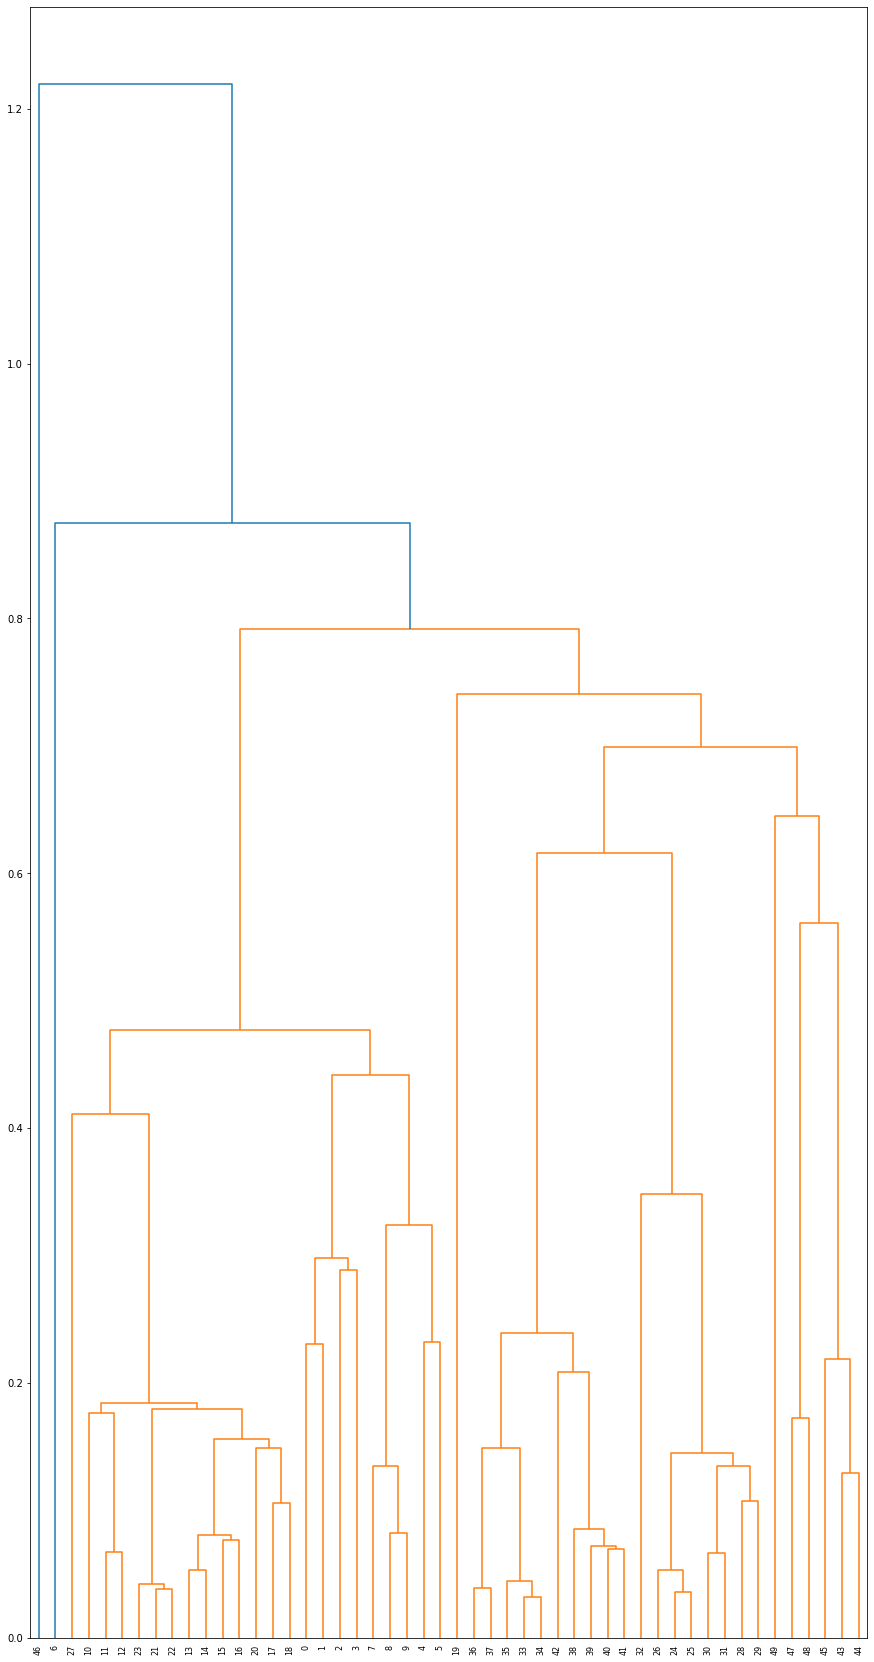

In [12]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,30))
dend = sch.dendrogram(sch.linkage(df[["MKT","PROFIT"]]))


In [14]:
# 2 clusters

from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(2)
pred = ag.fit_predict(df[["MKT","PROFIT"]])

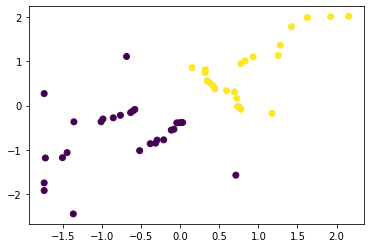

In [15]:
plt.scatter(df["MKT"],df["PROFIT"],c=ag.labels_)

In [16]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df[["MKT","PROFIT"]],pred))

0.5021657372523634
